In [1]:
# %load_ext cudf.pandas
import pandas as pd

In [2]:
job_data = pd.read_parquet(r"data\job_table.parquet")
job_data

,cores_alloc_layout,cores_allocated,cores_per_task,derived_ec,eligible_time,end_time,group_id,job_id,job_state,nodes,...,threads_per_core,time_limit,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,user_id,node_power_consumption,mem_power_consumption,cpu_power_consumption
0,"{900: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...","{900: 128, 915: 128, 902: 128, 901: 128, 904: ...",4,1:0,2020-05-31 22:09:29+00:00,2020-05-31 22:21:33+00:00,25200,2913594,CANCELLED,"[900, 901, 902, 903, 904, 905, 906, 907, 908, ...",...,NaN,270,64,64,475,3800,310,"[7970, 8450, 8460, 8470, 7440, 8470, 8460, 847...","[418, 724, 724, 678, 556, 654, 606, 600, 600, ...","[948, 1628, 1650, 1544, 1260, 1532, 1418, 1700..."
1,"{687: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...","{687: 128, 688: 128, 681: 128, 682: 128, 680: ...",4,1:0,2020-05-31 22:22:08+00:00,2020-05-31 22:41:25+00:00,25200,4063066,CANCELLED,"[680, 681, 682, 683, 684, 685, 686, 687, 688, ...",...,NaN,270,64,64,475,3800,310,"[7970, 8430, 7940, 8480, 7460, 8490, 6890, 848...","[720, 738, 736, 614, 720, 642, 632, 524, 598, ...","[1640, 1604, 1592, 1364, 1532, 1508, 1528, 147..."
2,"{687: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...","{687: 128, 688: 128, 681: 128, 682: 128, 680: ...",4,1:0,2020-05-31 22:41:38+00:00,2020-05-31 22:56:20+00:00,25200,5730196,CANCELLED,"[680, 681, 682, 683, 684, 685, 686, 687, 688, ...",...,NaN,270,64,64,475,3800,310,"[7950, 7970, 8500, 8480, 8470, 6900, 8460, 845...","[672, 720, 716, 630, 674, 474, 644, 606, 602, ...","[1654, 1600, 1606, 1438, 1506, 1108, 1496, 167..."
3,"{416: [0, 1, 2, 3, 4, 5, 6, 7]}",{416: 32},32,1:0,2020-05-31 23:26:23+00:00,2020-05-31 23:45:16+00:00,25200,3047960,FAILED,[416],...,NaN,30,4,4,59,59,379,"[860, 860, 860, 860, 860, 860, 860, 860, 860, ...","[38, 40, 46, 44, 48, 40, 44, 46, 42, 40, 40, 4...","[108, 182, 178, 182, 190, 174, 188, 186, 190, ..."
4,"{416: [0, 1, 2, 3, 4, 5, 6, 7]}",{416: 32},32,1:0,2020-05-31 23:08:01+00:00,2020-05-31 23:25:27+00:00,25200,5749077,FAILED,[416],...,NaN,30,4,4,59,59,379,"[860, 860, 860, 860, 860, 860, 860, 860, 860, ...","[36, 44, 42, 42, 44, 40, 44, 42, 50, 42, 42, 4...","[82, 182, 178, 180, 170, 168, 168, 192, 196, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231233,"{609: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...",{609: 128},32,0:0,2020-10-07 05:38:18+00:00,2020-10-07 05:38:21+00:00,25200,680209,COMPLETED,[609],...,NaN,1440,4,4,237,237,8,[920],[36],[90]
231234,"{386: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...",{386: 128},1,0:125,2020-10-07 07:38:03+00:00,2020-10-07 07:57:22+00:00,25200,2306759,COMPLETED,[386],...,NaN,30,4,4,7,237,182,"[870, 860, 860, 860, 860, 870, 860, 870, 860, ...","[44, 36, 36, 36, 36, 36, 36, 36, 52, 36, 36, 3...","[96, 92, 100, 90, 92, 94, 98, 94, 96, 90, 90, ..."
231235,"{55: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...",{55: 128},16,0:0,2020-10-07 09:56:10+00:00,2020-10-07 13:02:03+00:00,25200,2276256,COMPLETED,[55],...,NaN,540,4,4,234,234,666,"[620, 620, 610, 630, 630, 630, 620, 620, 630, ...","[38, 40, 38, 38, 38, 42, 38, 38, 40, 38, 38, 3...","[282, 202, 246, 234, 274, 288, 274, 288, 250, ..."
231236,"{858: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...",{858: 128},32,0:0,2020-10-07 06:04:00+00:00,2020-10-07 06:04:02+00:00,25200,4921388,COMPLETED,[858],...,NaN,1440,4,4,237,237,8,[860],[36],[46]


In [8]:
job_data['job_state'].value_counts()

job_state
COMPLETED        180310
FAILED            29840
CANCELLED         11218
TIMEOUT            8689
OUT_OF_MEMORY      1011
NODE_FAIL           170
Name: count, dtype: int64

In [9]:
job_data['submit_time'].min(), job_data['submit_time'].max()

(Timestamp('2020-05-05 15:55:59+0000', tz='UTC'),
 Timestamp('2020-10-13 04:44:57+0000', tz='UTC'))

C:\Users\Admin\AppData\Local\Temp\ipykernel_10440\1112971251.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  job_data['submit_month'] = job_data['submit_time'].dt.to_period('M')


<Axes: title={'center': 'Job Submissions per Month'}, xlabel='submit_month'>

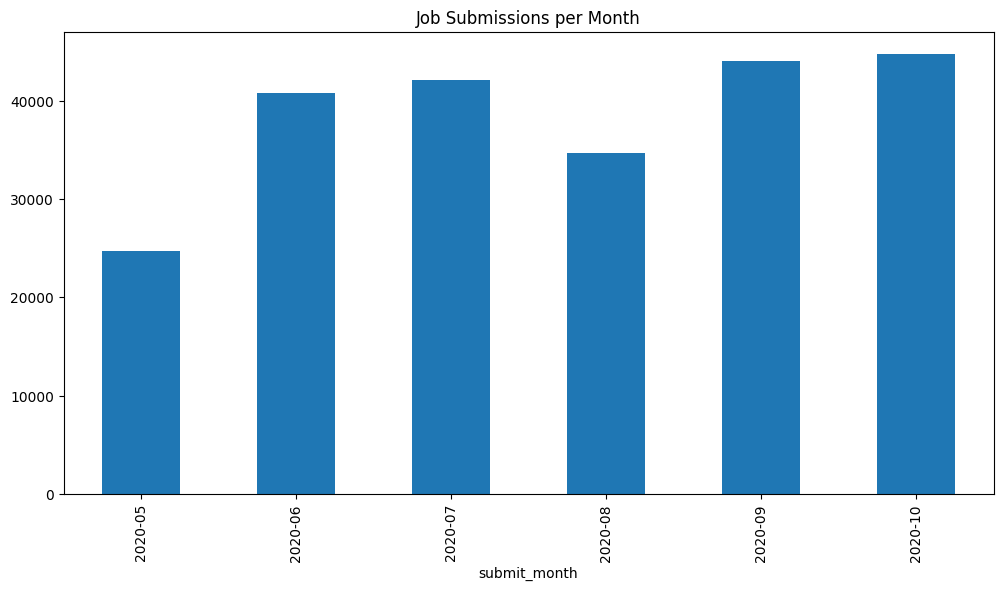

In [ ]:
# distribution of submit_time over months
job_data['submit_time'] = pd.to_datetime(job_data['submit_time'], unit='s')
job_data['submit_month'] = job_data['submit_time'].dt.to_period('M')
job_data['submit_month'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), title='Job Submissions per Month')

<Axes: title={'center': 'Job State Distribution per Month'}, xlabel='submit_month'>

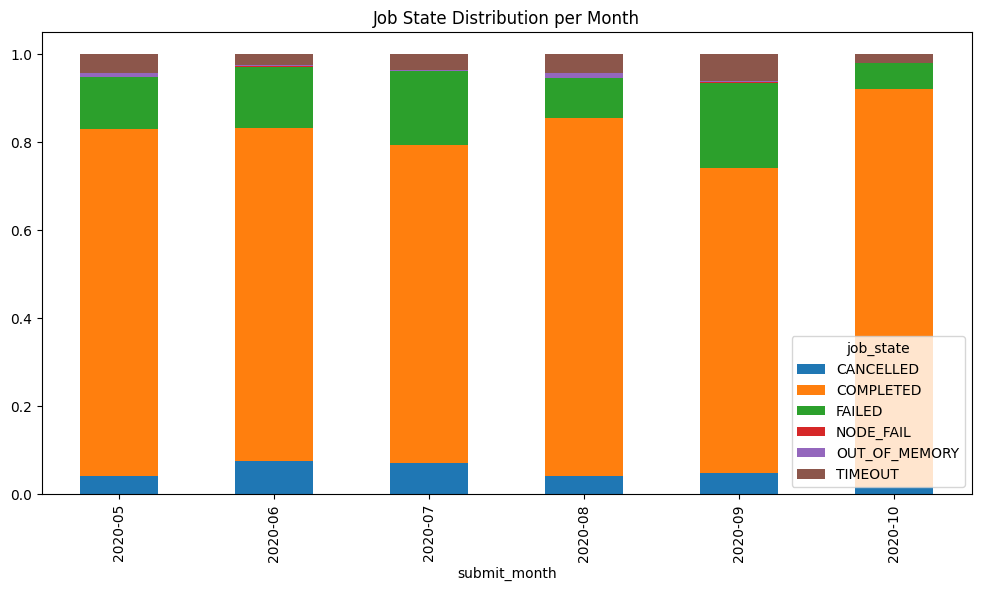

In [11]:
# Percentage of job_state in each month
job_data.groupby(['submit_month', 'job_state']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1).plot(kind='bar', stacked=True, figsize=(12,6), title='Job State Distribution per Month')  

In [3]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231238 entries, 0 to 231237
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   cores_alloc_layout      231238 non-null  object             
 1   cores_allocated         231238 non-null  object             
 2   cores_per_task          231238 non-null  int64              
 3   derived_ec              231238 non-null  object             
 4   eligible_time           231238 non-null  datetime64[us, UTC]
 5   end_time                231238 non-null  datetime64[us, UTC]
 6   group_id                231238 non-null  int64              
 7   job_id                  231238 non-null  int64              
 8   job_state               231238 non-null  object             
 9   nodes                   231238 non-null  object             
 10  num_cores_req           231238 non-null  int64              
 11  num_cores_alloc         23

In [4]:
# import ast
# nodes = job_data['nodes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# nodes.info()

# if not isinstance(nodes, (list, set, tuple)) or len(nodes) == 0:
#     print(type(nodes))
#     raise ValueError("Invalid node list for job")

In [5]:
df2 = pd.read_parquet(r"data\20-12\year_month=20-12\plugin=ipmi_pub\metric=ps1_input_power\a_0.parquet")
df2

,timestamp,value,node
0,2020-12-23 05:47:40+00:00,410,43
1,2020-12-23 05:48:00+00:00,410,43
2,2020-12-23 05:48:20+00:00,400,43
3,2020-12-23 05:48:40+00:00,410,43
4,2020-12-23 05:49:00+00:00,410,43
...,...,...,...
99545064,2020-12-27 02:50:20+00:00,390,723
99545065,2020-12-27 02:50:40+00:00,360,723
99545066,2020-12-27 02:51:00+00:00,420,723
99545067,2020-12-27 02:51:20+00:00,390,723


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99545069 entries, 0 to 99545068
Data columns (total 3 columns):
 #   Column     Dtype              
---  ------     -----              
 0   timestamp  datetime64[ms, UTC]
 1   value      int32              
 2   node       object             
dtypes: datetime64[ms, UTC](1), int32(1), object(1)
memory usage: 1.9+ GB


In [7]:
# df1 = pd.read_parquet("final_data/20-12.parquet")
df1

FileNotFoundError: [Errno 2] No such file or directory: 'final_data/20-12.parquet'